# **Section 4. Practical concerns**

## **L2 Regularization**


L2 regularization prevents weights to grow too large. We try to incorporate our prior belief, that the weights should be small. The regularized cost function is:
\begin{align}
J_{\text{L2}} = J + \lambda \| w \|_{\text{L2}} = J + \frac{\lambda}{2} w^T w.
\end{align}
The derivative is:
\begin{align}
\frac{\partial J_{\text{L2}}}{\partial w} = \frac{\partial J}{w} + \lambda w.
\end{align}

The basic functions (sigmoid, cross-entropy, gradient descent, test_train_split) added to utils.py.

In [8]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/OnlineLearning/UdemyCourses/LogisticRegression/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/OnlineLearning/UdemyCourses/LogisticRegression


In [2]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Logistic regression class

class LogisticRegressionL2Regularization:
  def __init__(self,lamb=1.0):
    self.lamb = lamb

  def add_ones(self,X):
    if X.ndim == 1:
      X.shape = [1,X.shape[0]]
    return np.column_stack( (np.ones(X.shape[0]),X) )

  def fit(self,X,t):
    # Add a column of ones
    Xb = self.add_ones(X)
    # randomly initialize weights
    D = Xb.shape[1]
    self.w = np.random.randn(D) #/ np.sqrt(D)
    #self.w = np.array([0,4,4]) #
    # passing objective function and gradient as a lambda to gradient descent function
    J = lambda w : cross_entropy(t, sigmoid(Xb @ w) )
    gradient = lambda w : Xb.T @ (sigmoid(Xb @ w) - t) + self.lamb * w
    self.w, self.cost = gradient_descent(self.w,J,gradient)
    
  def forward(self,X):
    # Add a column of ones
    Xb = self.add_ones(X)
    return np.round(sigmoid(Xb @ self.w))

  # Just to have the usual predict method as well
  def predict(self,X):
    return self.forward(X)

  def score(self,X,t):
    return np.mean( t == self.predict(X) )


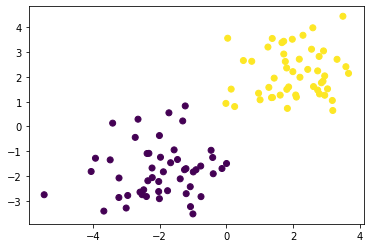

In [16]:
# Generating data

N = 100
D = 2

X = np.random.randn(N,D)

X[:50,:] = X[:50,:] - 2* np.ones((50,D))
X[50:,:] = X[50:,:] + 2* np.ones((50,D))
T = np.array([0]*50 + [1]*50)

plt.scatter(X[:,0],X[:,1],c=T)

X_train, T_train, X_test, T_test = train_test_split(X,T,0.3)

In [23]:
model = LogisticRegressionL2Regularization(lamb=1.0)
model.fit(X,T)
print(model.score(X,T))
print(model.w)


1.0
[-0.19738425  1.57627251  1.42059365]
